In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('Admission_predict.csv')
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


# Removing Sno. column as it has no role in predicting the chance of admit

In [3]:
df=dataset.drop('Serial No.',axis=1)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


### Renaming the column names as it contains spaces in between 

In [4]:
 df=df.rename(columns={'GRE Score':'GRE_score','TOEFL Score':'TOEFL_score','University Rating':'University_rating','SOP':'sop','LOR ':'lor',
                           'CGPA':'cgpa','Research':'Research','Chance of Admit ':'chance_of_admit'})

In [5]:
df

,GRE_score,TOEFL_score,University_rating,sop,lor,cgpa,Research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
df.isnull().any() #checking null values

GRE_score            False
TOEFL_score          False
University_rating    False
sop                  False
lor                  False
cgpa                 False
Research             False
chance_of_admit      False
dtype: bool

In [7]:
df.describe()  #description of data


,GRE_score,TOEFL_score,University_rating,sop,lor,cgpa,Research,chance_of_admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df.corr() #correlation b/w each independent variable to other
 
    
    

,GRE_score,TOEFL_score,University_rating,sop,lor,cgpa,Research,chance_of_admit
GRE_score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University_rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
sop,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
lor,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
cgpa,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
chance_of_admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [9]:
import seaborn as sns #to check outliers using boxplot

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GRE_score'>

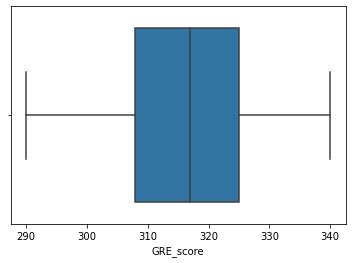

In [10]:
sns.boxplot(df['GRE_score'])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOEFL_score'>

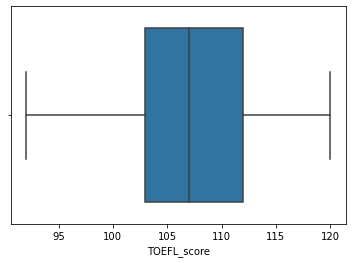

In [11]:
sns.boxplot(df['TOEFL_score'])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='University_rating'>

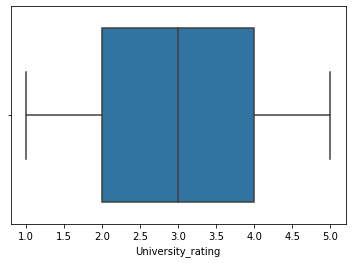

In [12]:
sns.boxplot(df['University_rating'])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sop'>

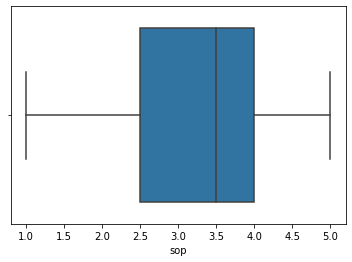

In [13]:
sns.boxplot(df['sop'])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lor'>

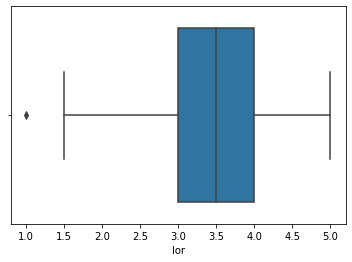

In [14]:
sns.boxplot(df['lor'])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cgpa'>

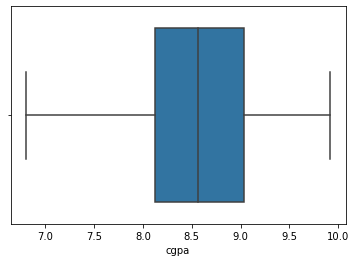

In [15]:
sns.boxplot(df['cgpa'])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Research'>

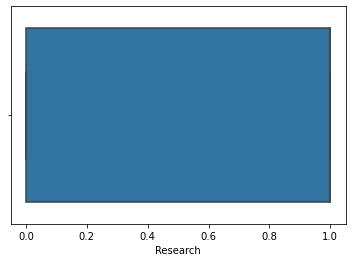

In [16]:
sns.boxplot(df['Research'])

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chance_of_admit'>

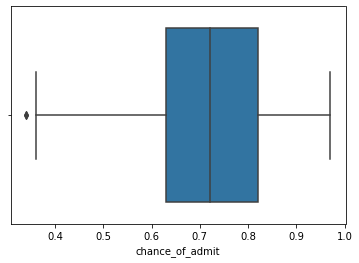

In [17]:
sns.boxplot(df['chance_of_admit'])

In [18]:
from scipy import stats #OUTLIER DETECTION

In [19]:
z=np.abs(stats.zscore(df))

In [20]:
z

array([[1.81923762, 1.77886545, 0.77558214, ..., 1.77680627, 0.88640526,
        1.40610734],
       [0.66714832, 0.03160087, 0.77558214, ..., 0.48585943, 0.88640526,
        0.27134907],
       [0.0418297 , 0.52536441, 0.09979274, ..., 0.95404281, 0.88640526,
        0.0123405 ],
       ...,
       [1.19888185, 2.10804114, 1.65095702, ..., 1.62785086, 0.88640526,
        1.47702973],
       [0.39631872, 0.68995225, 0.77558214, ..., 0.24236699, 1.12815215,
        0.0585819 ],
       [0.93301508, 0.95592621, 0.77558214, ..., 0.76721964, 1.12815215,
        0.83872821]])

In [21]:
threshold=3
np.where(z>threshold)  #here no threshold value present

(array([], dtype=int64), array([], dtype=int64))

In [22]:
df_no_outlier=df[(z<3).all(axis=1)] #removing outliers
df_no_outlier

,GRE_score,TOEFL_score,University_rating,sop,lor,cgpa,Research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [23]:
#splitting  Independent and Dependent variables
x=df_no_outlier.iloc[:,0:7].values
x

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 120.  ,   5.  , ...,   5.  ,   9.56,   1.  ],
       [312.  , 103.  ,   4.  , ...,   5.  ,   8.43,   0.  ],
       [327.  , 113.  ,   4.  , ...,   4.5 ,   9.04,   0.  ]])

In [24]:
y=df_no_outlier.iloc[:,-1].values
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

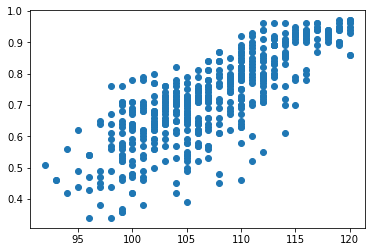

In [25]:
#to check linearity b/w each independent variable in x and y
plt.scatter(x[:,1],y) 

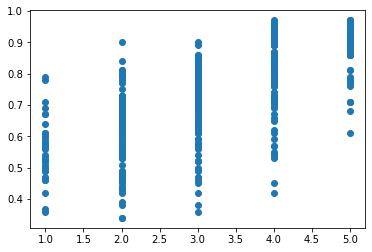

In [26]:
plt.scatter(x[:,2],y)

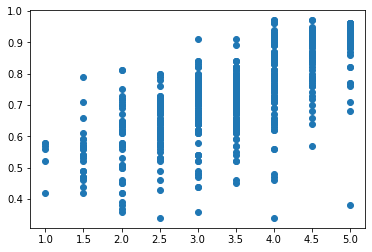

In [27]:
plt.scatter(x[:,3],y)

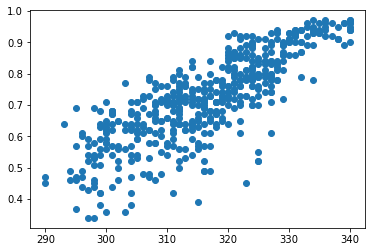

In [28]:
plt.scatter(x[:,0],y)

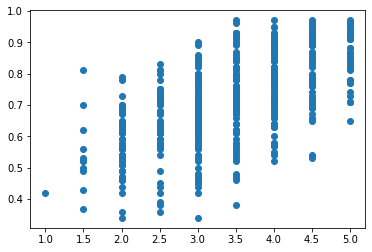

In [29]:
plt.scatter(x[:,4],y)

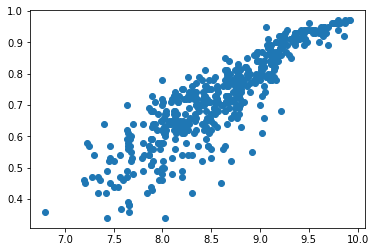

In [30]:
plt.scatter(x[:,5],y)

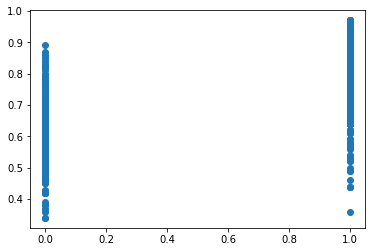

In [31]:
plt.scatter(x[:,6],y)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
x_train.shape

(400, 7)

In [34]:
x_test.shape

(100, 7)

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model  import LinearRegression

In [36]:
pipe=Pipeline([("sc",StandardScaler()),("linear",LinearRegression())])

In [37]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('sc', StandardScaler()), ('linear', LinearRegression())])

In [38]:
from joblib import dump
dump(pipe,'admission_predict.save')

['admission_predict.save']

In [44]:
import pickle
filename='admission_pickle'
pickle.dump(pipe,open(filename,'wb'))

In [39]:
y_pred=pipe.predict(x_test)

In [40]:
y_pred

array([0.6606252 , 0.83467888, 0.77803235, 0.88054515, 0.60126564,
       0.64356569, 0.53081352, 0.69581338, 0.52494695, 0.74711904,
       0.61091713, 0.70857888, 0.62202889, 0.75371215, 0.88455163,
       0.50857541, 0.82439288, 0.64614159, 0.7656139 , 0.53346257,
       0.51561087, 0.72319839, 0.52118775, 0.92174074, 0.8332172 ,
       0.72651112, 0.69865521, 0.50871376, 0.58246086, 0.59618334,
       0.72743587, 0.48564416, 0.65331018, 0.8414552 , 0.56459962,
       0.59803765, 0.84391714, 0.86746389, 0.59031772, 0.65993134,
       0.67020768, 0.90220251, 0.86565391, 0.72223457, 0.77319666,
       0.8068659 , 0.97014963, 0.85112801, 0.6429692 , 0.65569499,
       0.63193629, 0.6367591 , 0.61353916, 0.80117655, 0.6942999 ,
       0.85574591, 0.52489959, 0.86276624, 0.60022041, 0.63653589,
       0.49798224, 0.90699384, 0.61965598, 0.94547309, 0.7196482 ,
       0.61602013, 0.73614278, 0.8434937 , 0.519103  , 0.77895777,
       0.8947432 , 0.78381774, 0.69730948, 0.63992055, 0.78922

In [41]:
y_test

array([0.64, 0.85, 0.8 , 0.91, 0.68, 0.54, 0.54, 0.65, 0.52, 0.79, 0.65,
       0.74, 0.64, 0.79, 0.89, 0.43, 0.81, 0.73, 0.8 , 0.58, 0.57, 0.74,
       0.6 , 0.93, 0.88, 0.67, 0.7 , 0.57, 0.48, 0.64, 0.69, 0.47, 0.57,
       0.87, 0.39, 0.53, 0.84, 0.89, 0.63, 0.7 , 0.72, 0.86, 0.91, 0.75,
       0.74, 0.76, 0.96, 0.81, 0.6 , 0.62, 0.69, 0.68, 0.59, 0.8 , 0.71,
       0.78, 0.69, 0.89, 0.67, 0.58, 0.44, 0.89, 0.53, 0.92, 0.66, 0.73,
       0.52, 0.86, 0.54, 0.72, 0.92, 0.55, 0.75, 0.73, 0.85, 0.91, 0.75,
       0.71, 0.54, 0.68, 0.62, 0.88, 0.59, 0.74, 0.8 , 0.63, 0.77, 0.65,
       0.57, 0.7 , 0.76, 0.78, 0.71, 0.73, 0.73, 0.95, 0.64, 0.53, 0.48,
       0.64])

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7664048993199384